Group Members: Sapana Hingrajia, Jake McGraw, Joanna Rios, Himmat Jagdev

## Using ML to predict NBA 2024 Playoffs Results 

In this project, we use techniques learned so far to predict the teams that could make it to the Playoffs. 
We start by using the advanced statistics from 1992 to 2024, then concadenated all the csv gathered.
to build the main df "NBA_TeamStats1992-2024". 
We then apply various machine learning methods and approaches to attempt to create a accurate a model as possible to solve the classification problem at hand.

## Part 0: Data Cleaning and Preparation

Importing NBA_TeamStast Data frame and Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("NBA_TeamStats_1992-2024_df.csv")

df.head()


,Rk,Year,Team,Playoffs,Championship,Age,W,L,PW,PL,...,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1
0,1,1992,Chicago Bulls,1,1,27.6,67,15,66,16,...,0.063,0.556,0.518,11.8,35.1,0.221,0.476,14.1,69.3,0.219
1,2,1992,Portland Trail Blazers,1,0,28.1,57,25,59,23,...,0.128,0.541,0.495,13.6,35.6,0.253,0.471,14.3,69.9,0.251
2,3,1992,Utah Jazz,1,0,28.5,55,27,57,25,...,0.067,0.557,0.504,13.7,32.7,0.286,0.475,13.0,68.9,0.214
3,4,1992,Phoenix Suns,1,0,27.0,53,29,56,26,...,0.083,0.556,0.508,13.1,31.7,0.258,0.471,13.0,67.7,0.223
4,5,1992,Cleveland Cavaliers,1,0,27.6,57,25,55,27,...,0.101,0.557,0.506,11.8,30.5,0.259,0.483,12.3,66.5,0.174


Renaming columns to become familiar with the advance statistics names

In [3]:
# Rename the columns needed
df=pd.read_csv("NBA_TeamStats_1992-2024_df.csv")
df_renamed = df.rename(columns={
                                        "Rk": "RANK",
                                        "W": "WINS",
                                        "L": "LOSSES",
                                        "PW": "PYTHAGOREAN WINS",
                                        "PL": "PYTHAGOREAN LOSSES",
                                        "MOV": "MARGIN OF VICTORY",
                                        "SOS": "STRENGTH OF SCHEDULE",
                                        "SRS": "SIMPLE RATING SYSTEM",
                                        "ORtg": "OFFENSIVE RATING",
                                        "DRtg": "DEFENSIVE RATING",
                                        "NRtg": "NET RATING",
                                        "Pace": "PACE FACTOR",
                                        "FTr": "FREE THROW ATTEMPT RATE",
                                        "3PAr": "3-POINT ATTEMPT RATE",
                                        "TS%": "TRUE SHOOTING PERCENTAGE",
                                        "eFG%": "EFFECTIVE FIELD GOAL PERCENTAGE",
                                        "TOV%": "TURNOVER PERCENTAGE",
                                        "ORB%": "OFFENSIVE REBOUND PERCENTAGE",
                                        "FT/FGA": "FREE THROWS PER FIELD GOAL ATTEMPT",
                                        "eFG%.1": "OPPONENT EFFECTIVE FIELD GOAL PERCENTAGE",
                                        "TOV%.1": "OPPONENT TURNOVER PERCENTAGE",
                                        "DRB%": "DEFENSIVE REBOUND PERCENTAGE",
                                        "FT/FGA.1": "OPPONENT FREE THROWS PER FIELD GOAL ATTEMPT",
                                         })


df_renamed.head()

,RANK,Year,Team,Playoffs,Championship,Age,WINS,LOSSES,PYTHAGOREAN WINS,PYTHAGOREAN LOSSES,...,3-POINT ATTEMPT RATE,TRUE SHOOTING PERCENTAGE,EFFECTIVE FIELD GOAL PERCENTAGE,TURNOVER PERCENTAGE,OFFENSIVE REBOUND PERCENTAGE,FREE THROWS PER FIELD GOAL ATTEMPT,OPPONENT EFFECTIVE FIELD GOAL PERCENTAGE,OPPONENT TURNOVER PERCENTAGE,DEFENSIVE REBOUND PERCENTAGE,OPPONENT FREE THROWS PER FIELD GOAL ATTEMPT
0,1,1992,Chicago Bulls,1,1,27.6,67,15,66,16,...,0.063,0.556,0.518,11.8,35.1,0.221,0.476,14.1,69.3,0.219
1,2,1992,Portland Trail Blazers,1,0,28.1,57,25,59,23,...,0.128,0.541,0.495,13.6,35.6,0.253,0.471,14.3,69.9,0.251
2,3,1992,Utah Jazz,1,0,28.5,55,27,57,25,...,0.067,0.557,0.504,13.7,32.7,0.286,0.475,13.0,68.9,0.214
3,4,1992,Phoenix Suns,1,0,27.0,53,29,56,26,...,0.083,0.556,0.508,13.1,31.7,0.258,0.471,13.0,67.7,0.223
4,5,1992,Cleveland Cavaliers,1,0,27.6,57,25,55,27,...,0.101,0.557,0.506,11.8,30.5,0.259,0.483,12.3,66.5,0.174


In [4]:
# Check for missing values
print(df_renamed.isnull().sum())

RANK                                           0
Year                                           0
Team                                           0
Playoffs                                       0
Championship                                   0
Age                                            0
WINS                                           0
LOSSES                                         0
PYTHAGOREAN WINS                               0
PYTHAGOREAN LOSSES                             0
MARGIN OF VICTORY                              0
STRENGTH OF SCHEDULE                           0
SIMPLE RATING SYSTEM                           0
OFFENSIVE RATING                               0
DEFENSIVE RATING                               0
NET RATING                                     0
PACE FACTOR                                    0
FREE THROW ATTEMPT RATE                        0
3-POINT ATTEMPT RATE                           0
TRUE SHOOTING PERCENTAGE                       0
EFFECTIVE FIELD GOAL

In [5]:
# Summary statistics
print(df_renamed.describe())

             RANK         Year    Playoffs         Age        WINS  \
count  939.000000   939.000000  939.000000  939.000000  939.000000   
mean    15.188498  2008.006390    0.545261   26.852929   39.907348   
std      8.498190     9.500643    0.498213    1.762860   12.751142   
min      1.000000  1992.000000    0.000000   22.100000    7.000000   
25%      8.000000  2000.000000    0.000000   25.600000   30.000000   
50%     15.000000  2008.000000    1.000000   26.700000   41.000000   
75%     22.500000  2017.000000    1.000000   28.100000   50.000000   
max     30.000000  2024.000000    1.000000   32.000000   72.000000   

           LOSSES  PYTHAGOREAN WINS  PYTHAGOREAN LOSSES  MARGIN OF VICTORY  \
count  939.000000        939.000000          939.000000         939.000000   
mean    39.907348         40.018104           39.796592          -0.005027   
std     12.691473         12.455665           12.410711           4.675015   
min     10.000000          7.000000           11.000000  

## Part 1: Exploring the data. 

Determining if same amount of information/data is available accross the years.

In [6]:
df_renamed

,RANK,Year,Team,Playoffs,Championship,Age,WINS,LOSSES,PYTHAGOREAN WINS,PYTHAGOREAN LOSSES,...,3-POINT ATTEMPT RATE,TRUE SHOOTING PERCENTAGE,EFFECTIVE FIELD GOAL PERCENTAGE,TURNOVER PERCENTAGE,OFFENSIVE REBOUND PERCENTAGE,FREE THROWS PER FIELD GOAL ATTEMPT,OPPONENT EFFECTIVE FIELD GOAL PERCENTAGE,OPPONENT TURNOVER PERCENTAGE,DEFENSIVE REBOUND PERCENTAGE,OPPONENT FREE THROWS PER FIELD GOAL ATTEMPT
0,1,1992,Chicago Bulls,1,1,27.6,67,15,66,16,...,0.063,0.556,0.518,11.8,35.1,0.221,0.476,14.1,69.3,0.219
1,2,1992,Portland Trail Blazers,1,0,28.1,57,25,59,23,...,0.128,0.541,0.495,13.6,35.6,0.253,0.471,14.3,69.9,0.251
2,3,1992,Utah Jazz,1,0,28.5,55,27,57,25,...,0.067,0.557,0.504,13.7,32.7,0.286,0.475,13.0,68.9,0.214
3,4,1992,Phoenix Suns,1,0,27.0,53,29,56,26,...,0.083,0.556,0.508,13.1,31.7,0.258,0.471,13.0,67.7,0.223
4,5,1992,Cleveland Cavaliers,1,0,27.6,57,25,55,27,...,0.101,0.557,0.506,11.8,30.5,0.259,0.483,12.3,66.5,0.174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,26,2024,Memphis Grizzlies,0,0,24.4,27,55,24,58,...,0.428,0.543,0.509,13.4,23.8,0.182,0.551,13.5,74.8,0.195
935,27,2024,Detroit Pistons,0,0,23.8,14,68,20,62,...,0.360,0.562,0.526,13.5,23.9,0.193,0.558,11.1,77.3,0.221
936,28,2024,Washington Wizards,0,0,24.9,15,67,20,62,...,0.389,0.567,0.538,12.2,20.0,0.169,0.562,12.0,72.5,0.201
937,29,2024,Portland Trail Blazers,0,0,24.1,21,61,20,62,...,0.370,0.539,0.503,13.4,27.5,0.181,0.558,12.8,74.0,0.216


<Axes: ylabel='Frequency'>

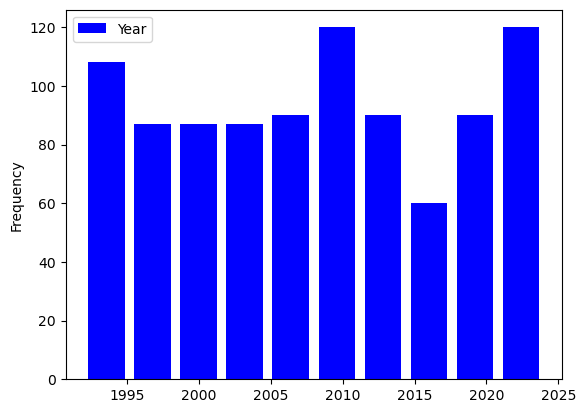

In [7]:
#Creating a dataframe to evaluate how many rows of data are in each year
df_year = df_renamed[["Year"]]
df_year.plot.hist(color="blue",rwidth=0.8) 


Filtering the df only to visualize teams that made it to the Championship over the years

In [8]:
#Filtering the df by Championship = 1
df_won_champ = df_renamed.loc[(df_renamed["Championship"].str.contains("1"))]

df_won_champ.head()

,RANK,Year,Team,Playoffs,Championship,Age,WINS,LOSSES,PYTHAGOREAN WINS,PYTHAGOREAN LOSSES,...,3-POINT ATTEMPT RATE,TRUE SHOOTING PERCENTAGE,EFFECTIVE FIELD GOAL PERCENTAGE,TURNOVER PERCENTAGE,OFFENSIVE REBOUND PERCENTAGE,FREE THROWS PER FIELD GOAL ATTEMPT,OPPONENT EFFECTIVE FIELD GOAL PERCENTAGE,OPPONENT TURNOVER PERCENTAGE,DEFENSIVE REBOUND PERCENTAGE,OPPONENT FREE THROWS PER FIELD GOAL ATTEMPT
0,1,1992,Chicago Bulls,1,1,27.6,67,15,66,16,...,0.063,0.556,0.518,11.8,35.1,0.221,0.476,14.1,69.3,0.219
28,2,1993,Chicago Bulls,1,1,28.1,57,25,58,24,...,0.093,0.535,0.499,12.0,36.3,0.199,0.493,15.4,68.7,0.239
60,7,1994,Houston Rockets,1,1,28.1,58,24,53,29,...,0.191,0.545,0.507,15.0,27.6,0.218,0.458,13.3,69.7,0.192
91,11,1995,Houston Rockets,1,1,28.5,47,35,47,35,...,0.267,0.568,0.529,15.0,26.9,0.232,0.489,13.9,67.7,0.199
108,1,1996,Chicago Bulls,1,1,29.9,72,10,70,12,...,0.196,0.555,0.517,13.1,36.9,0.217,0.482,16.1,71.1,0.222


In [9]:
#Creating a df to be used as a table correlation for further analysis

#New df filtered by who won the Championship 
df_renamed.copy()

df_won_champ_corr = df_renamed.drop(columns=["Team","Playoffs"])

df_won_champ_corr = df_won_champ_corr.loc[(df_renamed["Championship"].str.contains("1"))]

#df_won_champ_corr['Championship'].astype(int)
#df_won_champ_corr['Playoffs'].astype(int)

#Correlation table
df_won_champ_corr.head()

,RANK,Year,Championship,Age,WINS,LOSSES,PYTHAGOREAN WINS,PYTHAGOREAN LOSSES,MARGIN OF VICTORY,STRENGTH OF SCHEDULE,...,3-POINT ATTEMPT RATE,TRUE SHOOTING PERCENTAGE,EFFECTIVE FIELD GOAL PERCENTAGE,TURNOVER PERCENTAGE,OFFENSIVE REBOUND PERCENTAGE,FREE THROWS PER FIELD GOAL ATTEMPT,OPPONENT EFFECTIVE FIELD GOAL PERCENTAGE,OPPONENT TURNOVER PERCENTAGE,DEFENSIVE REBOUND PERCENTAGE,OPPONENT FREE THROWS PER FIELD GOAL ATTEMPT
0,1,1992,1,27.6,67,15,66,16,10.44,-0.37,...,0.063,0.556,0.518,11.8,35.1,0.221,0.476,14.1,69.3,0.219
28,2,1993,1,28.1,57,25,58,24,6.29,-0.10,...,0.093,0.535,0.499,12.0,36.3,0.199,0.493,15.4,68.7,0.239
60,7,1994,1,28.1,58,24,53,29,4.32,-0.12,...,0.191,0.545,0.507,15.0,27.6,0.218,0.458,13.3,69.7,0.192
91,11,1995,1,28.5,47,35,47,35,2.12,0.20,...,0.267,0.568,0.529,15.0,26.9,0.232,0.489,13.9,67.7,0.199
108,1,1996,1,29.9,72,10,70,12,12.24,-0.44,...,0.196,0.555,0.517,13.1,36.9,0.217,0.482,16.1,71.1,0.222


In [10]:
#Correlation table
df_won_champ_corr.corr()

,RANK,Year,Championship,Age,WINS,LOSSES,PYTHAGOREAN WINS,PYTHAGOREAN LOSSES,MARGIN OF VICTORY,STRENGTH OF SCHEDULE,...,3-POINT ATTEMPT RATE,TRUE SHOOTING PERCENTAGE,EFFECTIVE FIELD GOAL PERCENTAGE,TURNOVER PERCENTAGE,OFFENSIVE REBOUND PERCENTAGE,FREE THROWS PER FIELD GOAL ATTEMPT,OPPONENT EFFECTIVE FIELD GOAL PERCENTAGE,OPPONENT TURNOVER PERCENTAGE,DEFENSIVE REBOUND PERCENTAGE,OPPONENT FREE THROWS PER FIELD GOAL ATTEMPT
RANK,1.000000,0.054370,NaN,-0.015707,-0.470359,0.710106,-0.637549,0.865052,-0.848616,0.428351,...,0.224499,0.111130,0.118063,0.256846,-0.201502,0.002095,0.341107,-0.429047,0.040638,-0.122462
Year,0.054370,1.000000,NaN,-0.297544,-0.168811,0.168400,-0.199732,0.191658,-0.142018,-0.013333,...,0.876163,0.723235,0.719323,-0.065042,-0.829626,-0.482076,0.651239,-0.422564,0.904730,-0.423361
Championship,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,-0.015707,-0.297544,NaN,1.000000,0.051175,-0.250748,0.036424,-0.220917,0.112967,0.188284,...,-0.247458,-0.251511,-0.255604,0.121699,0.254179,0.215583,-0.264870,0.148467,-0.190890,0.015668
WINS,-0.470359,-0.168811,NaN,0.051175,1.000000,-0.557472,0.929614,-0.401585,0.657441,-0.029892,...,-0.147878,0.050477,0.042134,-0.321526,0.247783,-0.114498,-0.119220,0.313871,-0.153242,0.280620
LOSSES,0.710106,0.168400,NaN,-0.250748,-0.557472,1.000000,-0.516800,0.885834,-0.865082,0.329991,...,0.274501,0.089571,0.098782,0.185763,-0.314910,-0.060640,0.329364,-0.463918,0.205063,-0.089989
PYTHAGOREAN WINS,-0.637549,-0.199732,NaN,0.036424,0.929614,-0.516800,1.000000,-0.537966,0.761475,-0.123862,...,-0.181787,-0.024800,-0.040210,-0.312062,0.270049,-0.056985,-0.222449,0.417010,-0.149643,0.317462
PYTHAGOREAN LOSSES,0.865052,0.191658,NaN,-0.220917,-0.401585,0.885834,-0.537966,1.000000,-0.927882,0.431178,...,0.298515,0.180760,0.197859,0.151496,-0.318279,-0.134335,0.437495,-0.557381,0.185532,-0.117885
MARGIN OF VICTORY,-0.848616,-0.142018,NaN,0.112967,0.657441,-0.865082,0.761475,-0.927882,1.000000,-0.369502,...,-0.176751,0.003842,-0.007696,-0.286238,0.278210,-0.043116,-0.281115,0.484602,-0.136813,0.149859
STRENGTH OF SCHEDULE,0.428351,-0.013333,NaN,0.188284,-0.029892,0.329991,-0.123862,0.431178,-0.369502,1.000000,...,0.087693,-0.057936,0.006408,-0.097459,-0.004337,-0.291922,0.152294,-0.297277,0.088528,-0.028032


Heat map based on correlation table to identify potential indication of most important variables before starting the prediction

<Axes: >

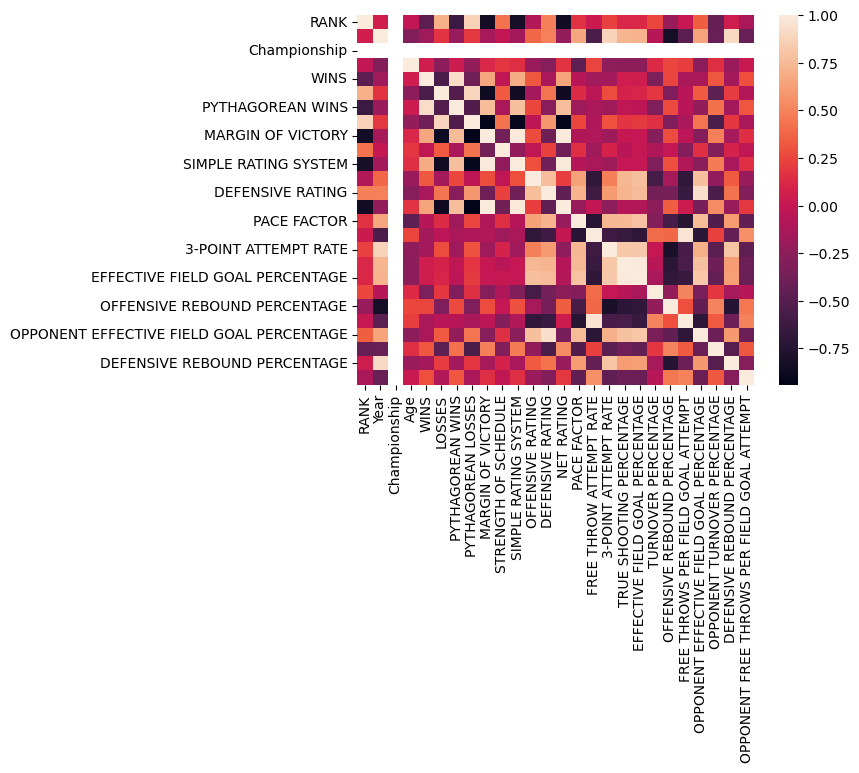

In [11]:
#correlation table to heatmap using sns
sns.heatmap(df_won_champ_corr.corr())

## Part 2: Analysis of the data

In [12]:
#df grouped by Championship
by_win = df_won_champ.groupby('Championship')
by_win["Team"].value_counts()

#Team counts by wins df
team_counts = by_win["Team"].value_counts()

team_counts_by_win = team_counts.reset_index()
team_counts_by_win.columns = ["Championship",'Team', 'Count']

team_counts_by_win


,Championship,Team,Count
0,1,Los Angeles Lakers,6
1,1,Chicago Bulls,5
2,1,San Antonio Spurs,5
3,1,Golden State Warriors,4
4,1,Miami Heat,3
5,1,Houston Rockets,2
6,1,Boston Celtics,1
7,1,Dallas Mavericks,1
8,1,Denver Nuggets,1
9,1,Detroit Pistons,1


In [13]:
#Championship column dropped
by_team = team_counts_by_win.drop(columns=['Championship'])

by_team

,Team,Count
0,Los Angeles Lakers,6
1,Chicago Bulls,5
2,San Antonio Spurs,5
3,Golden State Warriors,4
4,Miami Heat,3
5,Houston Rockets,2
6,Boston Celtics,1
7,Dallas Mavericks,1
8,Denver Nuggets,1
9,Detroit Pistons,1


In order to make a prediction is important to identify which teams have performed better over the years

Text(0.5, 1.0, 'Championships won by team')

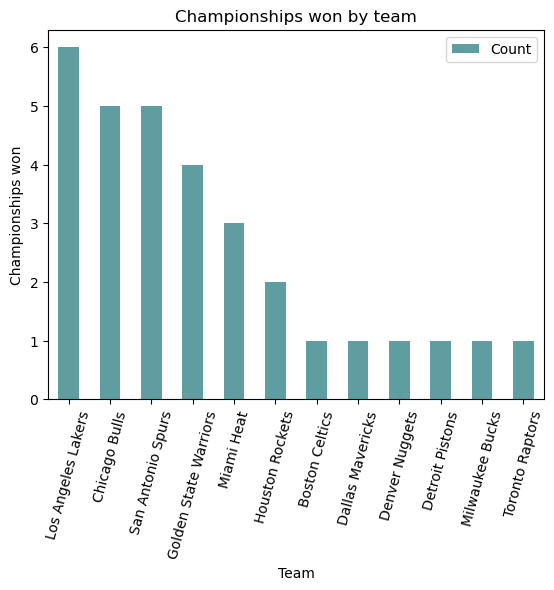

In [43]:
#Plotting Team vs age 
by_team.plot(x='Team', y='Count', kind='bar', color= "cadetblue")
plt.xticks(rotation=75)
#setting x and y labels 
plt.xlabel('Team')
plt.ylabel('Championships won')
#title
plt.title('Championships won by team')


Is Age an importan factor? 

The average age in the winer teams is narrowed between 26.6 to 31.7

In [15]:
#df Winners Teams and age 
df_team_age = df_won_champ[["Team" , "Age"]]

df_team_age

,Team,Age
0,Chicago Bulls,27.6
28,Chicago Bulls,28.1
60,Houston Rockets,28.1
91,Houston Rockets,28.5
108,Chicago Bulls,29.9
137,Chicago Bulls,30.7
168,Chicago Bulls,31.7
195,San Antonio Spurs,30.1
224,Los Angeles Lakers,29.2
260,Los Angeles Lakers,29.2


In [16]:
df_team_age.min()
df_team_age.max()


Team    Toronto Raptors
Age                31.7
dtype: object

Text(0.5, 1.0, 'Team vs Age')

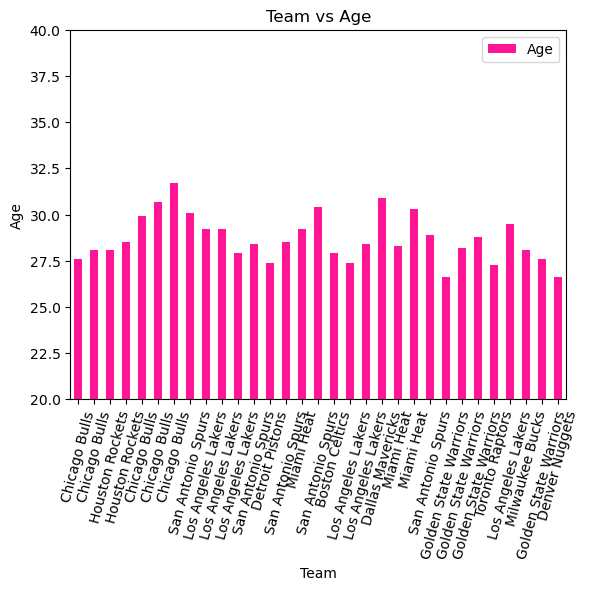

In [42]:
#Plotting winners teams vs age 
df_team_age = df_won_champ[["Team" , "Age"]]

df_team_age.plot(x='Team', y='Age', kind='bar', color= "deeppink")
plt.xticks(rotation=75)
#laxis imits
plt.ylim(20, 40) 
#setting x and y labels  
plt.xlabel('Team')
plt.ylabel('Age')
#title 
plt.title('Team vs Age')



Understanding if age correlates directly with wins

Text(0.5, 1.0, 'Age vs Wins')

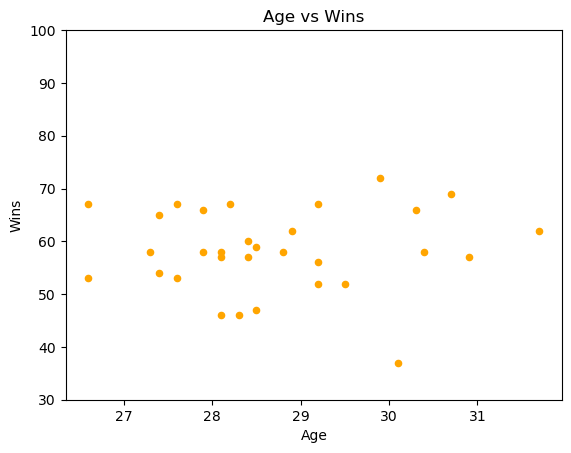

In [18]:
#Team vs age 
df_age_wins = df_won_champ[["Age" , "WINS"]]

df_age_wins.plot.scatter(x='Age', y='WINS', color= "orange")
#axis limits
plt.ylim(30, 100) 
#setting x and y labels  
plt.xlabel('Age')
plt.ylabel('Wins')
#title 
plt.title('Age vs Wins')

Text(0.5, 1.0, 'Margin of Victory vs Offensive Rebound %')

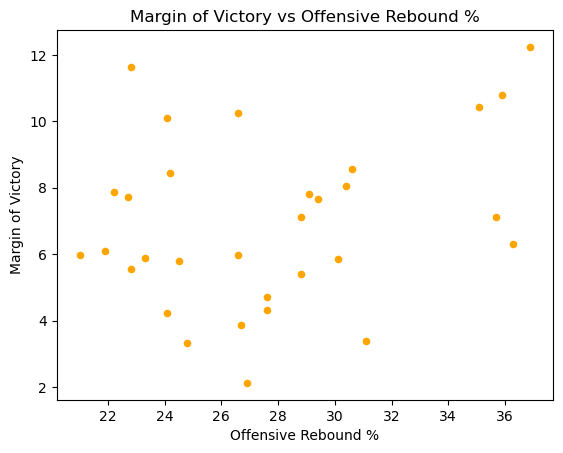

In [19]:
df_age_wins = df_won_champ[["OFFENSIVE REBOUND PERCENTAGE" , "MARGIN OF VICTORY"]]

df_age_wins.plot.scatter(x='OFFENSIVE REBOUND PERCENTAGE', y="MARGIN OF VICTORY", color= "orange")
#axis limits
#plt.ylim(30, 100) 
plt.xlabel('Offensive Rebound %')
plt.ylabel('Margin of Victory')
#title 
plt.title('Margin of Victory vs Offensive Rebound %')

### Using OneHotEncoder for Teams which is a categorical data. 

In [20]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

In [21]:
encodeded_teams = encoder.fit_transform(df_renamed[['Team']])

In [22]:
encodeded_teams_df = pd.DataFrame(encodeded_teams, columns=encoder.get_feature_names_out(["Team"]))

In [23]:
encodeded_teams_df.head()

,Team_Atlanta Hawks,Team_Boston Celtics,Team_Brooklyn Nets,Team_Charlotte Bobcats,Team_Charlotte Hornets,Team_Chicago Bulls,Team_Cleveland Cavaliers,Team_Dallas Mavericks,Team_Denver Nuggets,Team_Detroit Pistons,...,Team_Portland Trail Blazers,Team_Sacramento Kings,Team_San Antonio Spurs,Team_San Antonio Spurs*,Team_Seattle SuperSonics,Team_Toronto Raptors,Team_Utah Jazz,Team_Vancouver Grizzlies,Team_Washington Bullets,Team_Washington Wizards
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
df_renamed.drop(df_renamed.columns[2], axis=1, inplace=True)

df_concat = pd.concat([df_renamed,encodeded_teams_df], axis=1)

df_concat

,RANK,Year,Playoffs,Championship,Age,WINS,LOSSES,PYTHAGOREAN WINS,PYTHAGOREAN LOSSES,MARGIN OF VICTORY,...,Team_Portland Trail Blazers,Team_Sacramento Kings,Team_San Antonio Spurs,Team_San Antonio Spurs*,Team_Seattle SuperSonics,Team_Toronto Raptors,Team_Utah Jazz,Team_Vancouver Grizzlies,Team_Washington Bullets,Team_Washington Wizards
0,1,1992,1,1,27.6,67,15,66,16,10.44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1992,1,0,28.1,57,25,59,23,7.27,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1992,1,0,28.5,55,27,57,25,6.39,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,1992,1,0,27.0,53,29,56,26,5.94,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1992,1,0,27.6,57,25,55,27,5.45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,26,2024,0,0,24.4,27,55,24,58,-7.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
935,27,2024,0,0,23.8,14,68,20,62,-9.11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
936,28,2024,0,0,24.9,15,67,20,62,-9.29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
937,29,2024,0,0,24.1,21,61,20,62,-9.02,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Part 3 Creating the Model 

Creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier.

Split the Data into Training and Testing Sets

In [25]:
# Create the labels set `y` and features DataFrame `X`
y = df_concat['Championship']
X = df_concat.drop(columns=['Championship'])
display(y.head())
display(X.head())


0    1
1    0
2    0
3    0
4    0
Name: Championship, dtype: object

,RANK,Year,Playoffs,Age,WINS,LOSSES,PYTHAGOREAN WINS,PYTHAGOREAN LOSSES,MARGIN OF VICTORY,STRENGTH OF SCHEDULE,...,Team_Portland Trail Blazers,Team_Sacramento Kings,Team_San Antonio Spurs,Team_San Antonio Spurs*,Team_Seattle SuperSonics,Team_Toronto Raptors,Team_Utah Jazz,Team_Vancouver Grizzlies,Team_Washington Bullets,Team_Washington Wizards
0,1,1992,1,27.6,67,15,66,16,10.44,-0.37,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1992,1,28.1,57,25,59,23,7.27,-0.33,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1992,1,28.5,55,27,57,25,6.39,-0.69,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,1992,1,27.0,53,29,56,26,5.94,-0.26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1992,1,27.6,57,25,55,27,5.45,-0.11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# Check the balance of the labels variable (`y`) by using the `value_counts` function.
y.value_counts()

Championship
0       906
1        31
Null      2
Name: count, dtype: int64

In [27]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [28]:
num_rows = y_train.shape[0]
num_rows

704

### Scale the Features
Use the `StandardScaler` to scale the features data. Only `X_train` and `X_test` DataFrames should be scaled.

In [29]:
from sklearn.preprocessing import StandardScaler

# Create the StandardScaler instance
scaler = StandardScaler()

In [30]:
# Fit the Standard Scaler with the training data
scaler.fit(X_train)

# Fit the Standard Scaler with the test data
scaler.fit(X_test)

StandardScaler()

In [31]:
# Scale the training data
X_train_scaled = scaler.transform(X_train)

# Scale the test data
X_test_scaled = scaler.transform(X_test)

### Creation and Fitting Logistic Regression Model

Creating a Logistic Regression model, fitting it to the training data, making predictions with the testing data, and printing the model's accuracy score.

In [32]:
# Make and save testing predictions with the saved logistic regression model using the test data
logistic_regression_model = LogisticRegression(random_state=1)
logistic_regression_model.fit(X_train_scaled, y_train)
# Review the predictions
y_pred = logistic_regression_model.predict(X_test_scaled)
y_pred

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0

In [33]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
print(f"Training Data Score: {logistic_regression_model.score(X_train_scaled, y_train):.3f}")
print(f"Testing Data Score: {logistic_regression_model.score(X_test_scaled, y_test):.3f}")

# Generate predictions from the model we just fit
testing_predictions_lr = logistic_regression_model.predict(X_test_scaled)

# Display the accuracy score for the testing dataset
print('Logistic Regression Model Accuracy Score: %.3f' % accuracy_score(y_test, testing_predictions_lr) )

Training Data Score: 0.976
Testing Data Score: 0.970
Logistic Regression Model Accuracy Score: 0.970


### Using Random Forest Classifier Model

Using Random Forest Classifier model to fit the training data, make predictions with the testing data, and print the model's accuracy score.

In [34]:
# Make and save testing predictions with the saved logistic regression model using the test data
random_forest_model = RandomForestClassifier(random_state=1)
random_forest_model.fit(X_train_scaled, y_train)

# Review the predictions
y_pred = random_forest_model.predict(X_train_scaled)
y_pred

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', 'Null', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0',
       '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1',
       '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0',

In [35]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
print(f"Testing Data Score: {random_forest_model.score(X_test_scaled, y_test):.3f}")

Testing Data Score: 0.970


# Part 4 Data Preparation for Modeling

Next, we will prepare the data for modeling. We can choose a target variable, such as "Championship" or "Playoffs," and perform the following steps:

['1' '0' 'Null']
[1 0]
RANK                        0
Year                        0
Playoffs                    0
Championship                0
Age                         0
                           ..
Team_Toronto Raptors        0
Team_Utah Jazz              0
Team_Vancouver Grizzlies    0
Team_Washington Bullets     0
Team_Washington Wizards     0
Length: 67, dtype: int64
             RANK         Year    Playoffs  Championship         Age  \
count  939.000000   939.000000  939.000000    939.000000  939.000000   
mean    15.188498  2008.006390    0.545261      0.033014   26.852929   
std      8.498190     9.500643    0.498213      0.178768    1.762860   
min      1.000000  1992.000000    0.000000      0.000000   22.100000   
25%      8.000000  2000.000000    0.000000      0.000000   25.600000   
50%     15.000000  2008.000000    1.000000      0.000000   26.700000   
75%     22.500000  2017.000000    1.000000      0.000000   28.100000   
max     30.000000  2024.000000    1.000000    

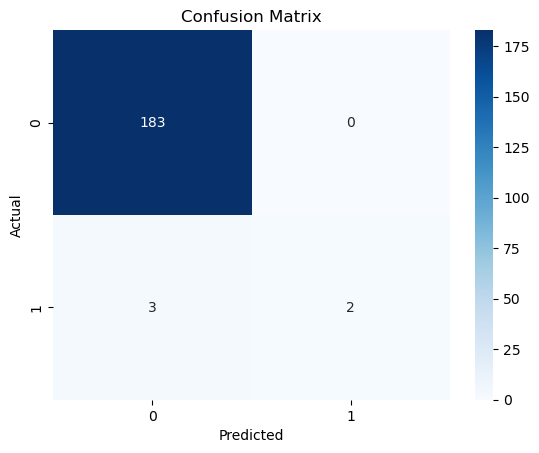

In [36]:
# Identify unique values in the 'Championship' column
print(df_concat['Championship'].unique())

# Replace 'Null' or other non-numeric values with NaN
df_concat['Championship'].replace('Null', np.nan, inplace=True)

# Assuming 'Null' means no championship, we replace with 0
df_concat['Championship'].fillna(0, inplace=True)

# Convert the column to integers
df_concat['Championship'] = df_concat['Championship'].astype(int)

# Verify the conversion
print(df_concat['Championship'].unique())

# Check for missing values
print(df_concat.isnull().sum())

# Summary statistics
print(df_concat.describe())

# Select only numeric columns
numeric_df = df_concat.select_dtypes(include=[np.number])

# Feature selection
features = ["WINS", "LOSSES", "PYTHAGOREAN WINS", "PYTHAGOREAN LOSSES", 
            "MARGIN OF VICTORY", "STRENGTH OF SCHEDULE", "SIMPLE RATING SYSTEM", 
            "OFFENSIVE RATING", "DEFENSIVE RATING", "NET RATING", "PACE FACTOR", 
            "FREE THROW ATTEMPT RATE", "3-POINT ATTEMPT RATE", "TRUE SHOOTING PERCENTAGE", 
            "EFFECTIVE FIELD GOAL PERCENTAGE", "TURNOVER PERCENTAGE", 
            "OFFENSIVE REBOUND PERCENTAGE", "FREE THROWS PER FIELD GOAL ATTEMPT", 
            "OPPONENT EFFECTIVE FIELD GOAL PERCENTAGE", "OPPONENT TURNOVER PERCENTAGE", 
            "DEFENSIVE REBOUND PERCENTAGE", "OPPONENT FREE THROWS PER FIELD GOAL ATTEMPT"]

X = numeric_df[features]
y = df_concat['Championship']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

# Visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The logistic regression model achieves an accuracy of approximately 98.40% on the test set, with a confusion matrix showing 183 true negatives (no championship) and 2 true positives (championship). However, the classification report indicates some challenges in classifying the positive class (championship), with a lower recall and F1-score due to only 2 true positives out of 5 total positive instances in the test set.

Given this information, it's important to note that the class imbalance in the target variable (championship) might affect the model's performance, especially in terms of correctly identifying instances of championship wins.

[1 0]
[1 0]
RANK                        0
Year                        0
Playoffs                    0
Championship                0
Age                         0
                           ..
Team_Toronto Raptors        0
Team_Utah Jazz              0
Team_Vancouver Grizzlies    0
Team_Washington Bullets     0
Team_Washington Wizards     0
Length: 67, dtype: int64
             RANK         Year    Playoffs  Championship         Age  \
count  939.000000   939.000000  939.000000    939.000000  939.000000   
mean    15.188498  2008.006390    0.545261      0.033014   26.852929   
std      8.498190     9.500643    0.498213      0.178768    1.762860   
min      1.000000  1992.000000    0.000000      0.000000   22.100000   
25%      8.000000  2000.000000    0.000000      0.000000   25.600000   
50%     15.000000  2008.000000    1.000000      0.000000   26.700000   
75%     22.500000  2017.000000    1.000000      0.000000   28.100000   
max     30.000000  2024.000000    1.000000      1.000000 

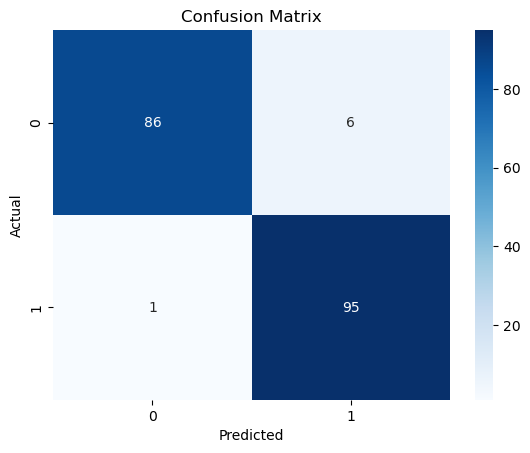

In [37]:
# Identify unique values in the 'Playoffs' column
print(df_concat['Playoffs'].unique())

# Replace 'Null' or other non-numeric values with NaN
df_concat['Playoffs'].replace('Null', np.nan, inplace=True)

# Assuming 'Null' means no Playoffs, we replace with 0
df_concat['Playoffs'].fillna(0, inplace=True)

# Convert the column to integers
df_concat['Playoffs'] = df_concat['Playoffs'].astype(int)

# Verify the conversion
print(df_concat['Playoffs'].unique())

# Check for missing values
print(df_concat.isnull().sum())

# Summary statistics
print(df_concat.describe())

# Select only numeric columns
numeric_df_1 = df_concat.select_dtypes(include=[np.number])

# Feature selection
features_1 = ["WINS", "LOSSES", "PYTHAGOREAN WINS", "PYTHAGOREAN LOSSES", 
            "MARGIN OF VICTORY", "STRENGTH OF SCHEDULE", "SIMPLE RATING SYSTEM", 
            "OFFENSIVE RATING", "DEFENSIVE RATING", "NET RATING", "PACE FACTOR", 
            "FREE THROW ATTEMPT RATE", "3-POINT ATTEMPT RATE", "TRUE SHOOTING PERCENTAGE", 
            "EFFECTIVE FIELD GOAL PERCENTAGE", "TURNOVER PERCENTAGE", 
            "OFFENSIVE REBOUND PERCENTAGE", "FREE THROWS PER FIELD GOAL ATTEMPT", 
            "OPPONENT EFFECTIVE FIELD GOAL PERCENTAGE", "OPPONENT TURNOVER PERCENTAGE", 
            "DEFENSIVE REBOUND PERCENTAGE", "OPPONENT FREE THROWS PER FIELD GOAL ATTEMPT"]

X = numeric_df_1[features_1]
y = numeric_df_1['Playoffs']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

# Visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The logistic regression model achieves an accuracy of approximately 96.28% on the test set. The confusion matrix shows that out of 188 samples, 86 were correctly predicted as not making the playoffs (true negatives), 95 were correctly predicted as making the playoffs (true positives), 6 were incorrectly predicted as making the playoffs when they didn't (false positives), and 1 was incorrectly predicted as not making the playoffs when it did (false negative). The classification report provides precision, recall, F1-score, and support for both classes (0 and 1). The model achieved high precision, recall, and F1-score for both classes, indicating good performance.

Overall, the logistic regression model appears to perform well on the given dataset for predicting playoff appearances based on the selected features.

Random Forest Classifier Accuracy: 0.9361702127659575
Confusion Matrix:
 [[82 10]
 [ 2 94]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93        92
           1       0.90      0.98      0.94        96

    accuracy                           0.94       188
   macro avg       0.94      0.94      0.94       188
weighted avg       0.94      0.94      0.94       188



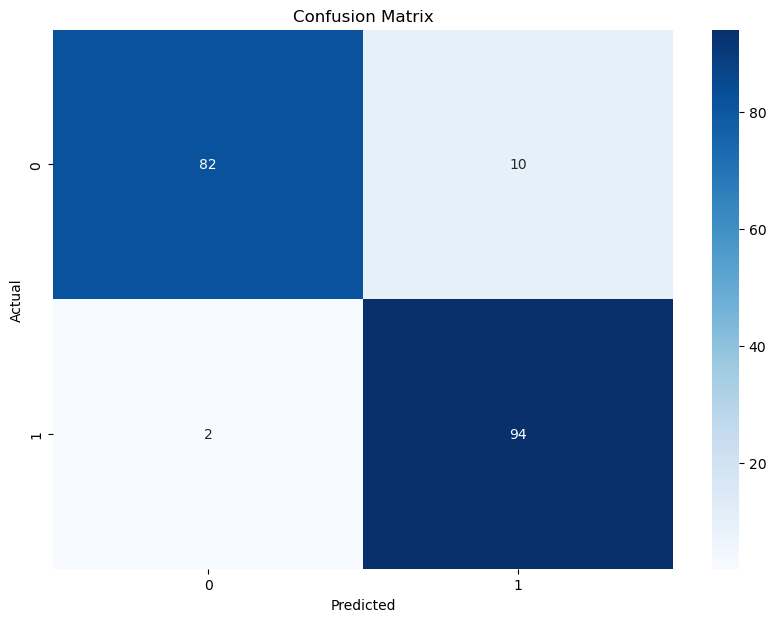

In [38]:
from imblearn.over_sampling import SMOTE

# Replace 'Null' or other non-numeric values with NaN
df_concat['Playoffs'].replace('Null', np.nan, inplace=True)

# Fill NaN values with 0
df_concat['Playoffs'].fillna(0, inplace=True)

# Convert the column to integers
df_concat['Playoffs'] = df_concat['Playoffs'].astype(int)

# Select only numeric columns
numeric_df_2 = df_concat.select_dtypes(include=[np.number])

# Feature selection
features_2 = ["WINS", "LOSSES", "PYTHAGOREAN WINS", "PYTHAGOREAN LOSSES", 
            "MARGIN OF VICTORY", "STRENGTH OF SCHEDULE", "SIMPLE RATING SYSTEM", 
            "OFFENSIVE RATING", "DEFENSIVE RATING", "NET RATING", "PACE FACTOR", 
            "FREE THROW ATTEMPT RATE", "3-POINT ATTEMPT RATE", "TRUE SHOOTING PERCENTAGE", 
            "EFFECTIVE FIELD GOAL PERCENTAGE", "TURNOVER PERCENTAGE", "OFFENSIVE REBOUND PERCENTAGE", 
            "FREE THROWS PER FIELD GOAL ATTEMPT", "OPPONENT EFFECTIVE FIELD GOAL PERCENTAGE", 
            "OPPONENT TURNOVER PERCENTAGE", "DEFENSIVE REBOUND PERCENTAGE", 
            "OPPONENT FREE THROWS PER FIELD GOAL ATTEMPT"]

X = numeric_df_2[features_2]
y = numeric_df_2['Playoffs']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Random Forest Classifier Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The Random Forest Classifier model achieves an accuracy of approximately 93.62% on the test set. Both models have similar confusion matrices, but the Logistic Regression model has fewer false positives (6) compared to the Random Forest Classifier (10). 

Both models perform well, with the Logistic Regression model slightly outperforming the Random Forest Classifier in terms of accuracy and precision for predicting both classes. However, the Random Forest Classifier exhibits slightly higher recall for class 1 (making playoffs), indicating its ability to better identify instances of this class.

The Random Forest Classifier performs slightly worse than the logistic regression model in terms of accuracy but still achieves strong results in predicting playoff appearances based on the selected features.